# Lab 5

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 演算法的實作可以參考[lab-5](https://yuanyuyuan.github.io/itcm/lab-5.html), 有任何問題歡迎找助教詢問。
4. **Deadline: 12/11(Wed.)**

In [1]:
name = "李澤諺"
student_id = "B05902023"

---

# Exercise 1
---
### An $m \times m$ _Hilbert matrix_ $H_m$ has entries $h_{ij} = 1/(i+j-1)$ for $ 1 \leq i, j \leq m$, and so it has the form
### $$\left [
   \begin{matrix}
     1 & 1/2 & 1/3 & \dots \\
     1/2 & 1/3 & 1/4 & \dots \\
     1/3 & 1/4 & 1/5 & \dots \\
     \vdots      & \vdots      & \vdots & \ddots 
   \end{matrix}
  \right ].$$

In [2]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

## Part 1
### Generate the Hilbert matrix of order $m$, for $m=2,3,\ldots, 12$.
### For each $m$, compute the condition number of $H_{m}$,  _ie_ , in $p$-norm for $p=1$ and $2$, and make a plot of the results.

---
### Part 1.1 

Define the function of Hilbert matrix

In [3]:
def hilbert_matrix(m):
    '''
    Return:
        2D np.array, the Hildert Matrix of order m
    '''
    H = np.zeros((m , m))
    for i in range(m):
        for j in range(m):
            H[i][j] = 1 / (i + j + 1)
    return H

Test your function.

In [4]:
print('H_2:\n', hilbert_matrix(2))

H_2:
 [[1.         0.5       ]
 [0.5        0.33333333]]


---
### Part 1.2

Collect all Hilbert matrices into the list `H_m` for m = 2, 3, ..., 12.


In [5]:
H_m = []
for m in range(2 , 13):
    H_m.append(hilbert_matrix(m))

Check your Hilbert matrix list.

In [6]:
for i in range(len(H_m)):
    print('H_%d:' % (i+2))
    print(H_m[i])
    print()

H_2:
[[1.         0.5       ]
 [0.5        0.33333333]]

H_3:
[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]

H_4:
[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]

H_5:
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]

H_6:
[[1.         0.5        0.33333333 0.25       0.2        0.16666667]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111]
 [0.2        0.16666667 0.14285714 0.125      0.1111111

---
### Part 1.3

Plot the condition number of $H_m$ for $m=2,3,\ldots, 12$

Collect all condition numbers in 1-norm of `H_m` into a list `one_norm`

In [7]:
one_norm = []
for i in range(11):
    one_norm.append(LA.norm(H_m[i] , 1) / LA.norm(LA.inv(H_m[i]) , 1))

In [8]:
print('one_norm:\n', one_norm)

one_norm:
 [0.0833333333333333, 0.004493464052287565, 0.00015296133137541839, 5.524906439503468e-06, 2.0648236637913913e-07, 6.8239373086425736e-09, 2.180731769950491e-10, 7.277812828044664e-12, 2.426363372806177e-13, 7.387117688843537e-15, 2.2627167250355443e-16]


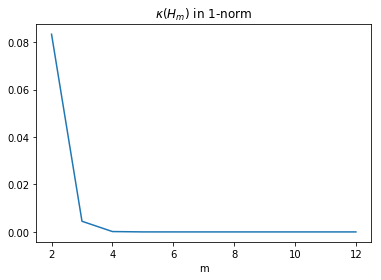

In [9]:
plt.plot(range(2,13), one_norm)
plt.xlabel('m')
plt.title(r'$\kappa(H_m)$ in 1-norm')
plt.show()

Collect all condition numbers in 2-norm of `H_m` into a list `two_norm`

In [10]:
two_norm = []
for i in range(11):
    two_norm.append(LA.norm(H_m[i] , 2) / LA.norm(LA.inv(H_m[i]) , 2))

In [11]:
print('two_norm:\n', two_norm)

two_norm:
 [0.08333333333333331, 0.0037846322866590615, 0.00014507417740930578, 5.152351054679042e-06, 1.7529439325786222e-07, 5.802964952326552e-09, 1.8851022079708264e-10, 6.040044796749552e-12, 1.9151496323761425e-13, 6.018505882132021e-15, 1.8194829306179473e-16]


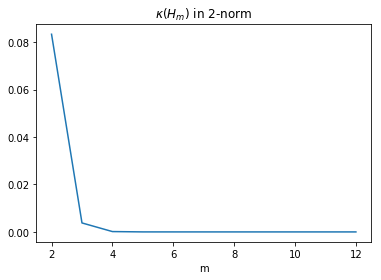

In [12]:
plt.plot(range(2,13), two_norm)
plt.xlabel('m')
plt.title(r'$\kappa(H_m)$ in 2-norm')
plt.show()

---
## Part 2 

### Now generate the $m$-vector $b_m = H_{m} x$ also, where $x$ is the $m$-vector with all of its components equal to $1$.

### Use Gaussian elimination to solve the resulting linear system $H_{m} x = b_m$ with $H_{m}$ and $b$ given above, obtaining an approximate solution $\tilde{x}$.

### Part 2.1

Construct the $m$-vector $b_m$ for $m = 2, 3, \dots, 12$. Store all 1D `np.array` $b_m$ into the list `b_m`.

In [13]:
b_m = []
for i in range(11):
    b_m.append(np.dot(H_m[i] , np.ones(H_m[i].shape[0])))

Print `b_m`

In [14]:
for i in range(len(b_m)):
    print('b_%d:' % (i+2))
    print(b_m[i])
    print()

b_2:
[1.5        0.83333333]

b_3:
[1.83333333 1.08333333 0.78333333]

b_4:
[2.08333333 1.28333333 0.95       0.75952381]

b_5:
[2.28333333 1.45       1.09285714 0.88452381 0.74563492]

b_6:
[2.45       1.59285714 1.21785714 0.99563492 0.84563492 0.73654401]

b_7:
[2.59285714 1.71785714 1.32896825 1.09563492 0.93654401 0.81987734
 0.73013376]

b_8:
[2.71785714 1.82896825 1.42896825 1.18654401 1.01987734 0.89680042
 0.80156233 0.72537185]

b_9:
[2.82896825 1.92896825 1.51987734 1.26987734 1.09680042 0.96822899
 0.86822899 0.78787185 0.72169538]

b_10:
[2.92896825 2.01987734 1.60321068 1.34680042 1.16822899 1.03489566
 0.93072899 0.84669538 0.77725094 0.7187714 ]

b_11:
[3.01987734 2.10321068 1.68013376 1.41822899 1.23489566 1.09739566
 0.98955252 0.90225094 0.82988251 0.7687714  0.71639045]

b_12:
[3.10321068 2.18013376 1.75156233 1.48489566 1.29739566 1.15621919
 1.04510808 0.95488251 0.87988251 0.81639045 0.761845   0.71441417]



### Part 2.2

Implement the function of __Gaussian elimination__. 

(Note that you need to implement it by hand, simply using some package functions is not allowed.)

In [15]:
def gaussian_elimination(
    A,
    b
):
    '''
    Arguments:
        A : 2D np.array
        b : 1D np.array

    Return:
        x : 1D np.array, solution to Ax=b
    '''
    
    m = A.shape[0]
    U = np.copy(A)
    x = np.zeros(m)
    y = np.copy(b)
    for i in range(m - 1):
        L = np.identity(m)
        for j in range(i + 1 , m):
            L[j][i] = -(U[j][i] / U[i][i])
            U[j , i : ] += (L[j][i] * U[i , i : ])
            y[j] += (L[j][i] * y[i])

    x[-1] = y[-1] / U[-1][-1]
    for i in range(1 , m):
        x[-1 - i] = (y[-1 - i] - np.dot(U[-1 - i , -i : ] , x[-i : ])) / U[-1 - i][-1 - i]
    
    return x

Store all approximate solutions $\tilde{x}$ of $H_m$ into a list `x_m` for $m = 2, 3, \dots, 12$

In [16]:
x_m = []
for i in range(len(H_m)):
    x = gaussian_elimination(H_m[i], b_m[i])
    x_m.append(x)

---
## Part 3

### Investigate the error behavior of the computed solution $\tilde x$.
### (i) Compute the $\infty$-norm of the residual $r = b-H_{m} \tilde{x}$.
### (ii) Compute the error $\delta x = \tilde{x}-x$, where $x$ is the vector of all ones. 
### (iii) How large can you take $m$ before there is no significant digits in the solution ?

### Part 3.1

Compute the $\infty$-norm of the residual $r_m = b_m-H_{m} \tilde{x}$ for $m = 2, 3, \dots, 12$. And store the values into the list `r_m`.

In [17]:
r_m = []
for i in range(11):
    r_m.append(LA.norm(b_m[i] - np.dot(H_m[i] , x_m[i]) , np.inf))

In [18]:
print('r_m:\n', r_m)

r_m:
 [0.0, 2.220446049250313e-16, 0.0, 2.220446049250313e-16, 2.220446049250313e-16, 2.220446049250313e-16, 2.220446049250313e-16, 4.440892098500626e-16, 2.220446049250313e-16, 4.440892098500626e-16, 4.440892098500626e-16]


Plot the figure of the $\infty$-norm of the residual for $m = 2, 3, \dots, 12$

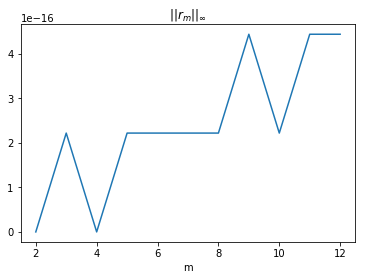

In [19]:
plt.plot(range(2,13), r_m)
plt.xlabel('m')
plt.title(r'$||r_m||_\infty$')
plt.show()

### Part 3.2

Compute the error $\delta x = \tilde{x}-x$, where $x$ is the vector of all ones. And store the values into the list `delta_x`.

In [20]:
delta_x = []
for i in range(11):
    delta_x.append(x_m[i] - np.ones(x_m[i].shape[0]))

Collect all errors $\delta x$ in 2-norm into the list `delta_x_two_norm` for $m = 2, 3, ..., 12$

In [21]:
delta_x_two_norm = []
for i in range(11):
    delta_x_two_norm.append(LA.norm(delta_x[i] , 2))

In [22]:
print('delta_x_two_norm =', delta_x_two_norm)

delta_x_two_norm = [8.005932084973442e-16, 1.762179615616027e-14, 1.531093756529614e-13, 3.4726989976779822e-12, 3.380198688368993e-10, 9.687978241052163e-09, 4.244691764807721e-07, 1.7393602379023114e-07, 0.0001452735113877698, 0.007757231295806999, 0.6867691718060317]


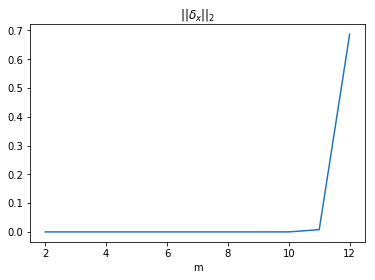

In [23]:
plt.plot(range(2,13), delta_x_two_norm)
plt.xlabel('m')
plt.title(r'$||\delta_x||_2$')
plt.show()

### Part 3.3

How large can you take  $m$  before there is no significant digits in the solution ?

由Part 3.2的圖可以看出，當m大於11時，誤差 $||\delta x||_2$ 會突然增加，因此m可以取到的最大值應為11。